# K-means

In [54]:
import numpy as np
import matplotlib.pyplot as plt

**Generating Data** and choosing random **centroids**

In [105]:
n = 500
x1 = np.random.randint(0,200,n) 
x2 = np.random.randint(0,200,n)

In [153]:
def initialize_Kmeans( k , x1 , x2 ):

    points = np.array([[x1[i] , x2[i]] for i in range (len(x1)) ])
    centroids = ( points[np.random.randint(0,len(x1))] for i in range(k))
    centroids = np.array(list(centroids))
    
    return points , centroids

def plot_kmeans( x1,x2, all_clusters ):
    k = len(all_clusters)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].scatter(x1, x2,s = 15)
    for i in range(k):
        
        axes[1].scatter(all_clusters[i][:,0],all_clusters[i][:,1], s = 15)
        axes[1].plot(np.mean( all_clusters[i][:,0] ) , np.mean( all_clusters[i][:,1] ) , "*" , markersize = 15 )

#         plt.scatter(all_clusters[i][:,0],all_clusters[i][:,1])
#         plt.plot(np.mean( all_clusters[i][:,0] ) , np.mean( all_clusters[i][:,1] ) , "*" , markersize = 20 )
    plt.show()  
'''#Making  a list of all distances----------------------------------------------------------------------'''
def calculate_distance( points , centroids ):
    all_distances = [ ]
    for c in range(len(centroids)):

        distances = []
        for p in range(len(points)):
            distance = np.linalg.norm(points[p] - centroids[c] )
            distances.append(distance)

        all_distances.append(distances)

    return all_distances
'''# Getting the cluster of each point:----------------------------------------------------------------  ''' 
def assign_clusters(points , all_distances):
    indeces_of_min = []
    for p in range (len(points)):
    #     index_of_min = np.where(all_distancesA[:,p]==all_distancesA[:,p].min())
        all_distances = np.array(all_distances)
        indeces_of_min.append( all_distances[ : , p ].argmin() )
    return indeces_of_min

'''#Creating Clusters:----------------------------------------------------------------------------------'''
def create_clusters(indeces_of_min , points):
    all_clusters = [ ]
    for i in  range(0, max(indeces_of_min) + 1):
        cluster = []
        loc = np.where( np.array(indeces_of_min) == i )
        for lo in loc:
            for l in lo:
                point = [points[l ,0],points[l ,1]]
                cluster.append(point)
        all_clusters.append(np.array(cluster))
    return all_clusters
'''#calculating new centroids ---------------------------------------------------------------------------'''
def new_centroids(all_clusters):
    centroids = []
    #for i in range(len( all_clusters )):
    for cluster in all_clusters:
        try:
            centroids.append( np.array ( [  np.mean(cluster[:,0]) , np.mean(cluster[:,1]) ] ) )
        except: 
            centroids.append( np.array ( [ np.random.randint(0,len(x1)), np.random.randint(0,len(x1)) ] ) )
            

    return centroids
    

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
0 centroids matched
2 centroids matched
0 centroids matched
2 centroids matched
3 centroids matched
5 centroids matched
condition met at 15 itterations
distortion = 240498.228975362
number of clusters = 5
number of itterations = 15


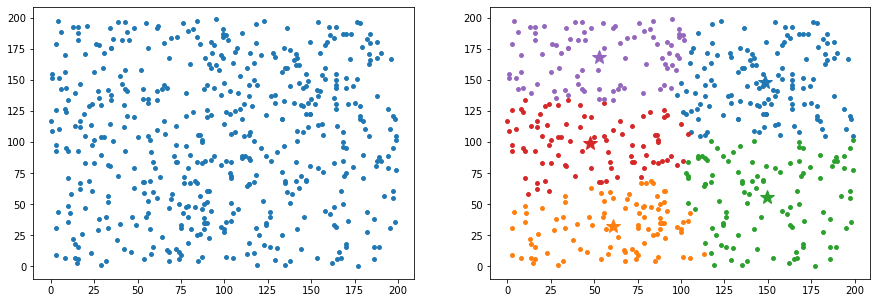

In [192]:
def Kmeans( k , x1 , x2 ):
    points , centroids  =  initialize_Kmeans( k , x1 , x2 )
    for i in range (1000):
#         print(centroids)
        
        all_distances =  calculate_distance( points , centroids )
        
        indeces_of_min = assign_clusters(points , all_distances)
        all_clusters = create_clusters(indeces_of_min , points)
        
        centroids_old = centroids.copy()

        centroids = new_centroids(all_clusters)


        try:
#             if np.array(centroids).all() == np.array(centroids_old).all():
            check_x = []
            check_y = []
            for cen in range(len(centroids)):

                if (abs(centroids[cen][0] == centroids_old[cen][0]) ) and (abs(centroids[cen][1] == centroids_old[cen][1])) :
                    check_x.append(1)
                    check_y.append(1)

            print(f"{sum(check_x)} centroids matched")
                
        except:
            print("Failed to stop")
            pass
        if (sum(check_x) == len(centroids)) and (sum(check_y) == len(centroids)):
                    print(f"condition met at {i + 1} itterations")
                    break
                     

    print(f"distortion = {np.sum(all_distances)}")
    print(f"number of clusters = {len(all_clusters)}") 
    print(f"number of itterations = {i+1}") 
    

    plot_kmeans( x1,x2, all_clusters )
    return np.sum(all_distances) , all_clusters
            


distortion , all_clusters = Kmeans( 5 , x1 , x2 )
    

In [159]:
distortion

242493.39940988238

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 19 itterations
distortion = 190692.5705697278
number of clusters = 4
number of itterations = 19


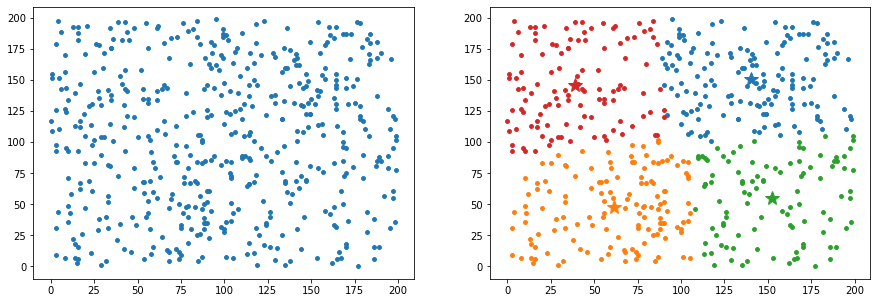

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
4 centroids matched
condition met at 13 itterations
distortion = 190907.08966205802
number of clusters = 4
number of itterations = 13


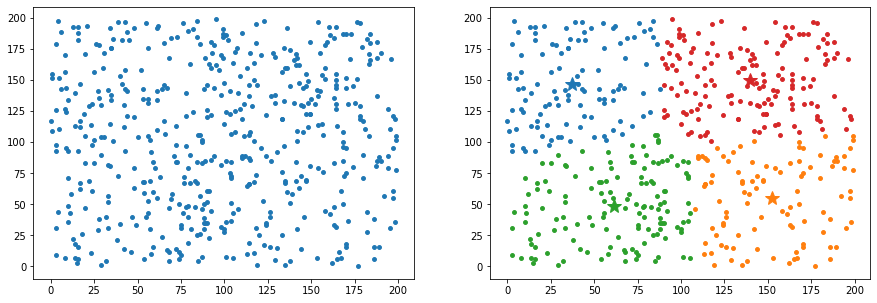

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 14 itterations
distortion = 190692.5705697278
number of clusters = 4
number of itterations = 14


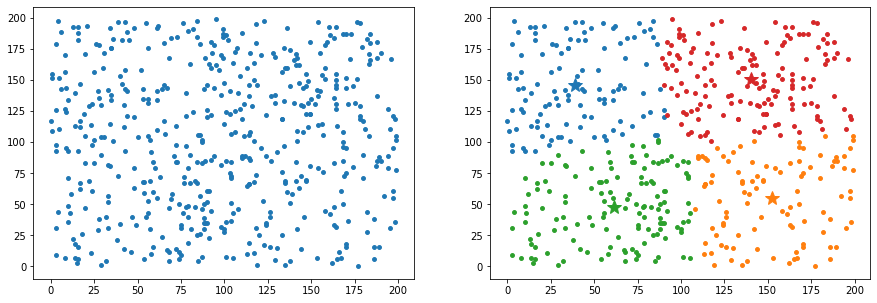

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
2 centroids matched
2 centroids matched
2 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 15 itterations
distortion = 190429.34717085265
number of clusters = 4
number of itterations = 15


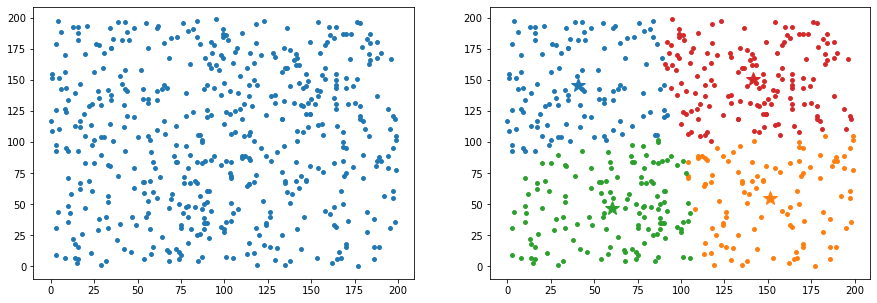

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
2 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 22 itterations
distortion = 190692.5705697278
number of clusters = 4
number of itterations = 22


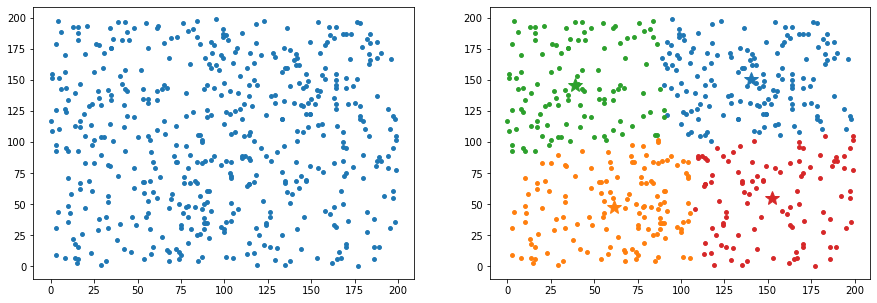

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 25 itterations
distortion = 190429.34717085265
number of clusters = 4
number of itterations = 25


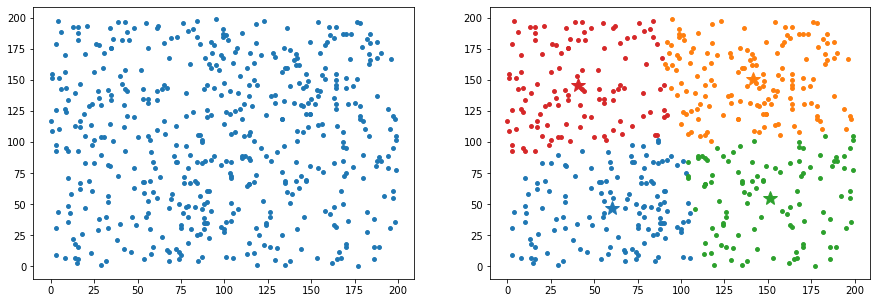

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
4 centroids matched
condition met at 12 itterations
distortion = 190907.089662058
number of clusters = 4
number of itterations = 12


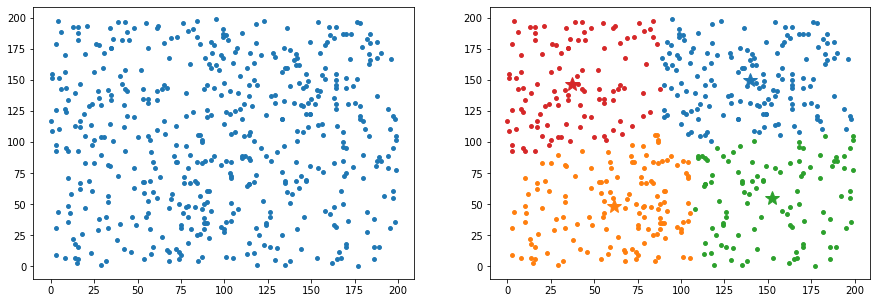

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
2 centroids matched
4 centroids matched
condition met at 12 itterations
distortion = 190429.34717085265
number of clusters = 4
number of itterations = 12


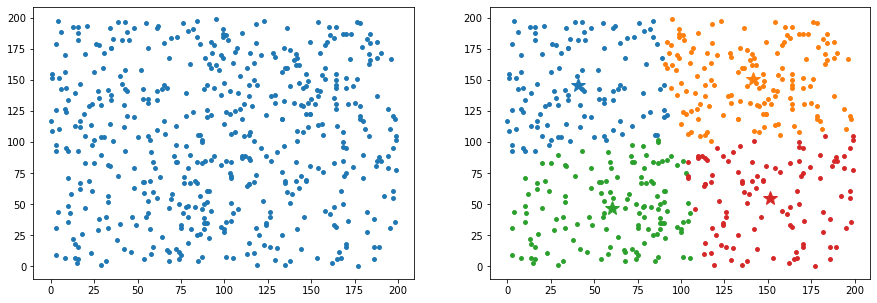

0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
2 centroids matched
4 centroids matched
condition met at 6 itterations
distortion = 186969.12144964962
number of clusters = 4
number of itterations = 6


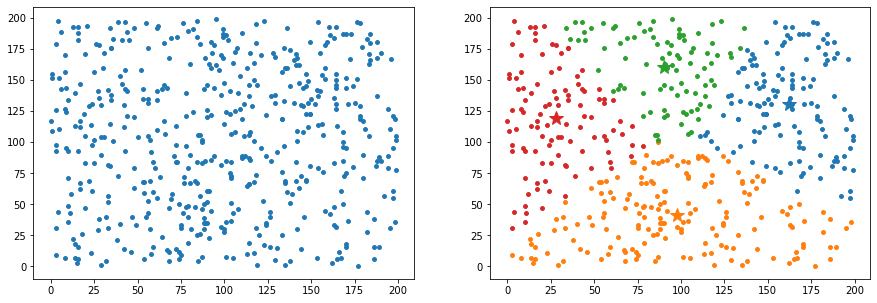

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 23 itterations
distortion = 190692.5705697278
number of clusters = 4
number of itterations = 23


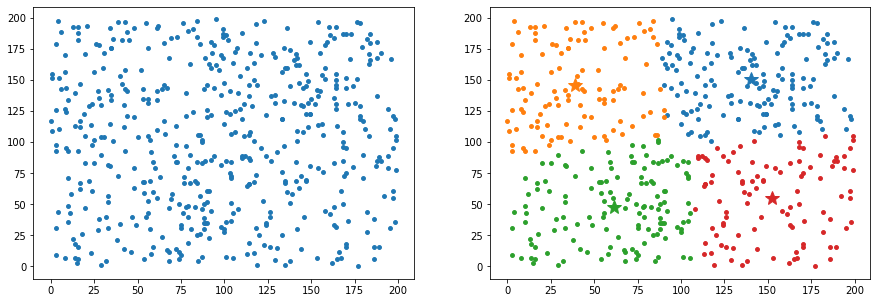

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
1 centroids matched
2 centroids matched
4 centroids matched
condition met at 12 itterations
distortion = 190429.34717085265
number of clusters = 4
number of itterations = 12


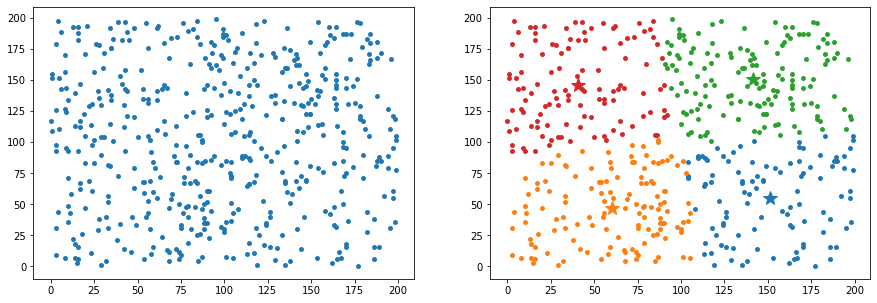

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
1 centroids matched
2 centroids matched
4 centroids matched
condition met at 15 itterations
distortion = 190692.5705697278
number of clusters = 4
number of itterations = 15


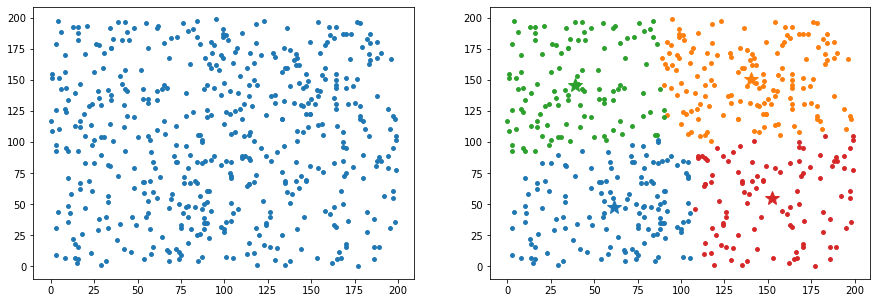

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
0 centroids matched
0 centroids matched
2 centroids matched
4 centroids matched
condition met at 24 itterations
distortion = 190429.34717085262
number of clusters = 4
number of itterations = 24


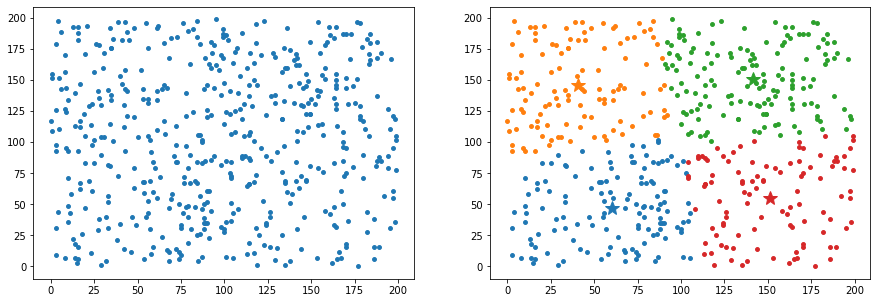

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
1 centroids matched
1 centroids matched
2 centroids matched
4 centroids matched
condition met at 8 itterations
distortion = 190563.73667606583
number of clusters = 4
number of itterations = 8


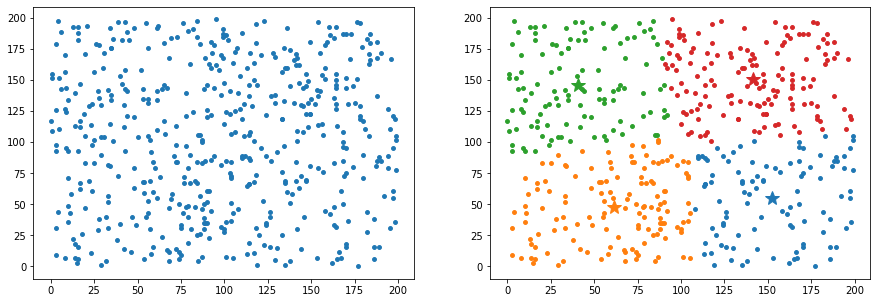

0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
0 centroids matched
2 centroids matched
2 centroids matched
2 centroids matched
2 centroids matched
4 centroids matched
condition met at 14 itterations
distortion = 190429.34717085265
number of clusters = 4
number of itterations = 14


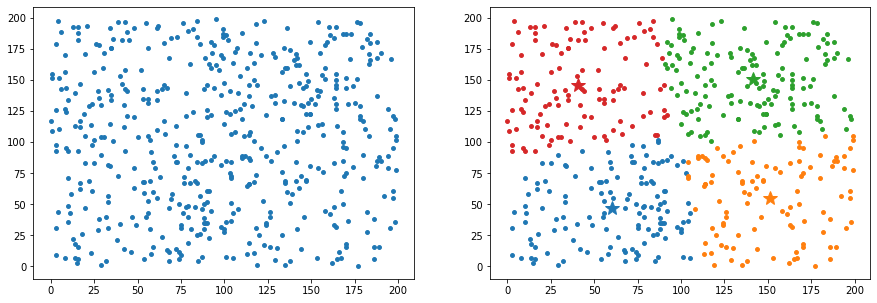

In [193]:
distortion_list=[]
clusters_list = []
for i in range(15):
    distortion , all_clusters = Kmeans( 4 , x1 , x2 )
    distortion_list.append(distortion)
    clusters_list.append(all_clusters)  
    
   

Best clustering is:

The least distortion is at position 8 
distortion  =   186969.12144964962 


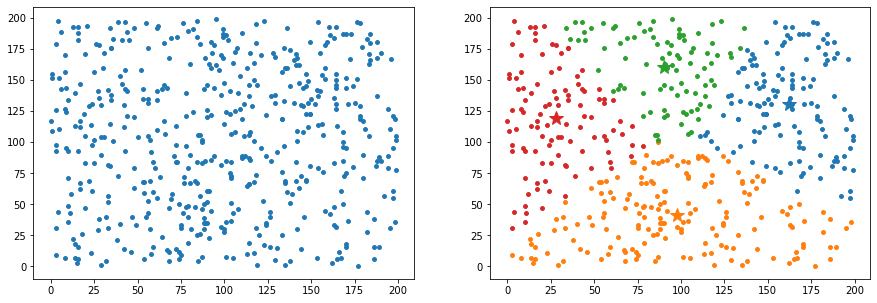

In [194]:
print(f"The least distortion is at position {distortion_list.index(min(distortion_list))} ")
print(f"distortion  =   {min(distortion_list)} ") 

plot_kmeans( x1,x2, clusters_list[distortion_list.index(min(distortion_list))] )